In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

Mnist Image classification

In [3]:
from tensorflow.keras.datasets import mnist
(train_images, y_train), (test_images, y_test) = mnist.load_data()
x_train = train_images.reshape(60000, 28, 28, 1) / 255
x_test = test_images.reshape(10000, 28, 28, 1) / 255


In [5]:
x_train.shape

(60000, 28, 28, 1)

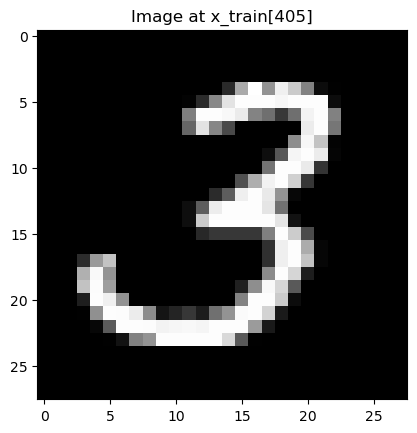

In [11]:
import matplotlib.pyplot as plt

image = x_train[405]

# Plotting the image
plt.imshow(image, cmap='gray')
plt.title('Image at x_train[405]')
plt.show()


In [12]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary(line_length=80)

Model: "sequential_1"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 conv2d_2 (Conv2D)                  (None, 26, 26, 32)              320         
                                                                                
 max_pooling2d_2 (MaxPooling2D)     (None, 13, 13, 32)              0           
                                                                                
 conv2d_3 (Conv2D)                  (None, 11, 11, 64)              18496       
                                                                                
 max_pooling2d_3 (MaxPooling2D)     (None, 5, 5, 64)                0           
                                                                                
 flatten_1 (Flatten)                (None, 1600)                    0           
                                                                                
 dense

Epoch 1/10
1200/1200 [==============================] - 25s 20ms/step - loss: 0.1484 - accuracy: 0.9551 - val_loss: 0.0515 - val_accuracy: 0.9835
Epoch 2/10
1200/1200 [==============================] - 27s 22ms/step - loss: 0.0443 - accuracy: 0.9865 - val_loss: 0.0333 - val_accuracy: 0.9873
Epoch 3/10
1200/1200 [==============================] - 27s 22ms/step - loss: 0.0305 - accuracy: 0.9904 - val_loss: 0.0378 - val_accuracy: 0.9879
Epoch 4/10
1200/1200 [==============================] - 26s 22ms/step - loss: 0.0225 - accuracy: 0.9926 - val_loss: 0.0281 - val_accuracy: 0.9903
Epoch 5/10
1200/1200 [==============================] - 28s 23ms/step - loss: 0.0169 - accuracy: 0.9945 - val_loss: 0.0340 - val_accuracy: 0.9886
Epoch 6/10
1200/1200 [==============================] - 32s 26ms/step - loss: 0.0121 - accuracy: 0.9963 - val_loss: 0.0297 - val_accuracy: 0.9915
Epoch 7/10
1200/1200 [==============================] - 29s 24ms/step - loss: 0.0102 - accuracy: 0.9966 - val_loss: 0.0278 -

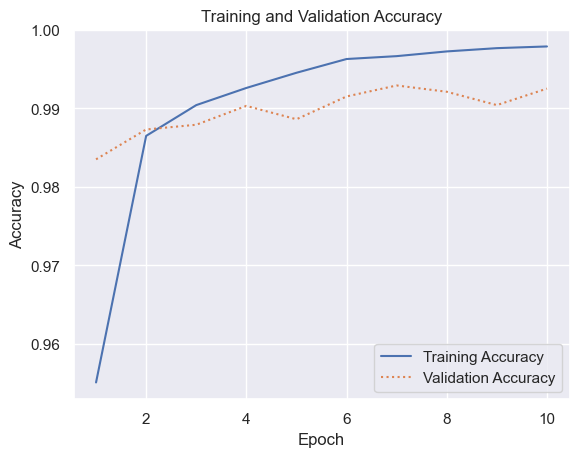

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=50)

acc = hist.history['accuracy']

val_acc = hist.history['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

Training a CNN to Recognize Arctic Wildlife

In [16]:
import os
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline


def load_images_from_path(path, label):
    images, labels = [], []
    
    for file in os.listdir(path):
        img = image.load_img(os.path.join(path, file), target_size=(224, 224, 3))
        images.append(image.img_to_array(img))
        labels.append((label))
    return images, labels

def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20),
    subplot_kw={'xticks': [], 'yticks': []})
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)
    
x_train, y_train, x_test, y_test = [], [], [], []

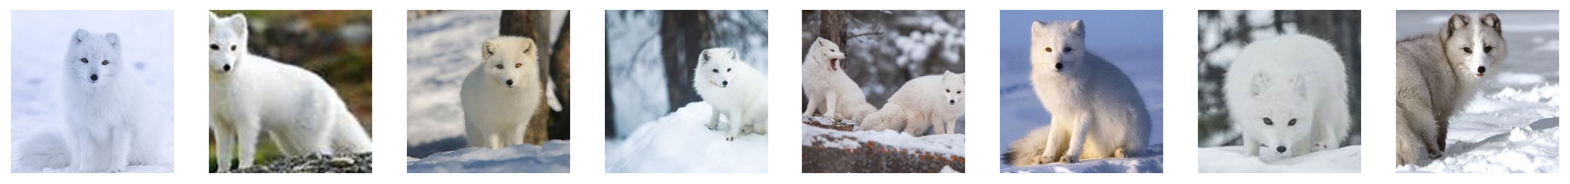

In [18]:
images, labels = load_images_from_path('arctic-wildlife/train/arctic_fox', 0)
show_images(images)


In [19]:
x_train += images
y_train += labels

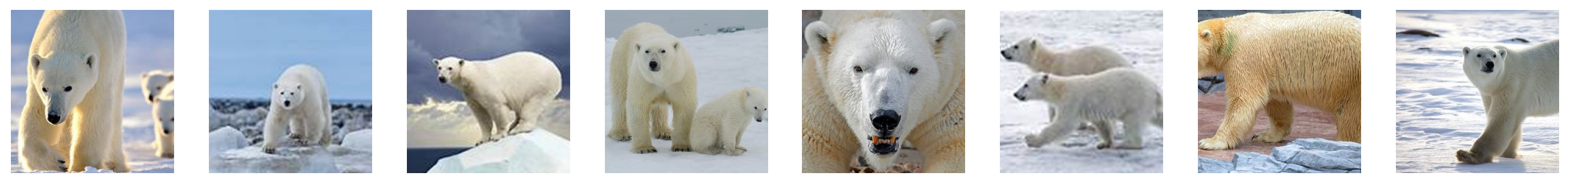

In [20]:
images, labels = load_images_from_path('arctic-wildlife/train/polar_bear', 1)
show_images(images)


In [21]:
x_train += images
y_train += labels


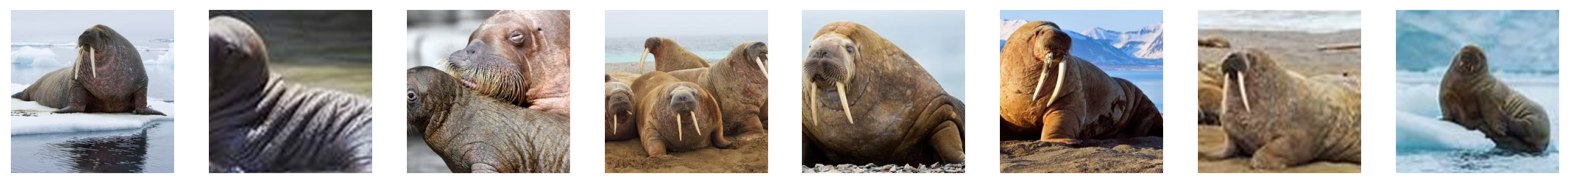

In [22]:
images, labels = load_images_from_path('arctic-wildlife/train/walrus', 2)
show_images(images)

In [23]:
x_train += images
y_train += labels

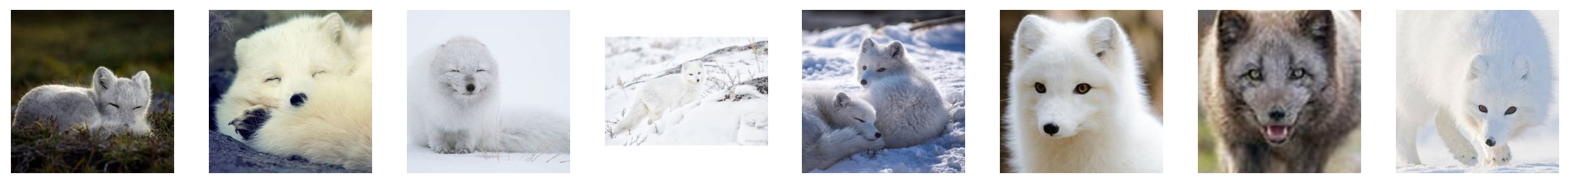

In [25]:
images, labels = load_images_from_path('arctic-wildlife/test/arctic_fox', 0)
show_images(images)

In [26]:
x_test += images
y_test += labelsarctic-wildlife

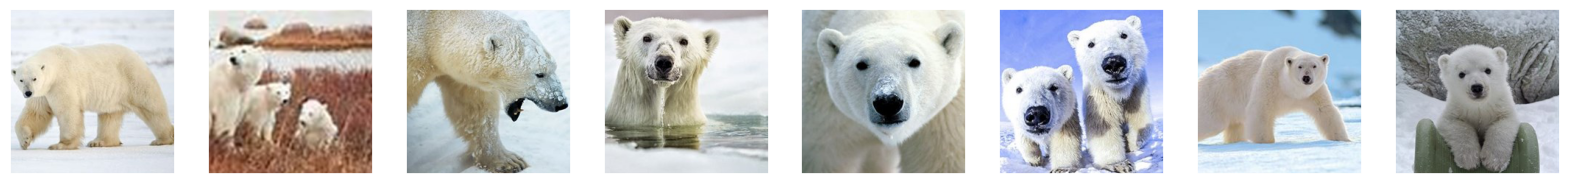

In [27]:
images, labels = load_images_from_path('arctic-wildlife/test/polar_bear', 1)
show_images(images)

In [28]:
x_test += images
y_test += labels

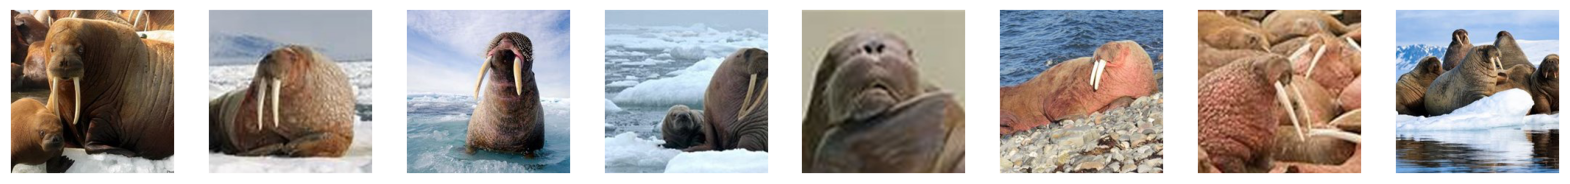

In [29]:
images, labels = load_images_from_path('arctic-wildlife/test/walrus', 2)
show_images(images)

In [30]:
x_test += images
y_test += labels

In [31]:
import numpy as np
x_train = np.array(x_train) / 255
x_test = np.array(x_test) / 255
y_train = np.array(y_train)
y_test = np.array(y_test)


In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary(line_length=80)

Model: "sequential_2"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 conv2d_4 (Conv2D)                  (None, 222, 222, 32)            896         
                                                                                
 max_pooling2d_4 (MaxPooling2D)     (None, 111, 111, 32)            0           
                                                                                
 conv2d_5 (Conv2D)                  (None, 109, 109, 64)            18496       
                                                                                
 max_pooling2d_5 (MaxPooling2D)     (None, 54, 54, 64)              0           
                                                                                
 conv2d_6 (Conv2D)                  (None, 52, 52, 64)              36928       
                                                                                
 max_p

In [34]:
hist = model.fit(x_train, y_train,
 validation_data=(x_test, y_test),
 batch_size=10, epochs=20)


Epoch 1/20
30/30 [==============================] - 14s 446ms/step - loss: 1.1676 - accuracy: 0.3600 - val_loss: 1.0861 - val_accuracy: 0.3333
Epoch 2/20
30/30 [==============================] - 13s 449ms/step - loss: 1.0947 - accuracy: 0.3633 - val_loss: 1.0773 - val_accuracy: 0.3583
Epoch 3/20
30/30 [==============================] - 14s 450ms/step - loss: 0.9389 - accuracy: 0.5500 - val_loss: 0.8246 - val_accuracy: 0.5667
Epoch 4/20
30/30 [==============================] - 13s 448ms/step - loss: 0.7533 - accuracy: 0.6300 - val_loss: 0.8550 - val_accuracy: 0.5750
Epoch 5/20
30/30 [==============================] - 13s 449ms/step - loss: 0.7272 - accuracy: 0.6600 - val_loss: 0.7399 - val_accuracy: 0.6917
Epoch 6/20
30/30 [==============================] - 14s 454ms/step - loss: 0.6845 - accuracy: 0.6833 - val_loss: 1.0014 - val_accuracy: 0.5417
Epoch 7/20
30/30 [==============================] - 14s 482ms/step - loss: 0.6214 - accuracy: 0.7033 - val_loss: 0.8037 - val_accuracy: 0.6417

[]

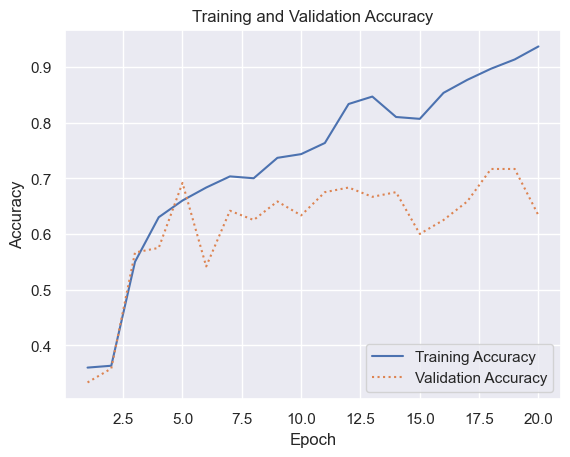

In [36]:
import seaborn as sns
sns.set()
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()
